# Interact with lerepi

In [1]:
import logging
import numpy as np
import matplotlib.pyplot as plt

from lerepi.core.parser import lerepi_parser
from lerepi.core import handler
import abc
import os
import lerepi
import healpy as hp

from lenscarf.utils import read_map
from plancklens.qcinv import opfilt_pp

class parserclass:
    """An abstract element base type for the parser formalism."""
    __metaclass__ = abc.ABCMeta
parser = parserclass()

could not setup healpix hack. reverting to standard healpy


In [2]:
module_path = os.path.dirname(lerepi.__file__)
parser.resume = ''
parser.config_file = module_path+'/config/cmbs4/c08d.py'

lerepi_handler = handler.handler(parser)
lerepi_handler.collect_jobs()
# lerepi_handler.run()

In [3]:
jobs = lerepi_handler.get_jobs()
job = lerepi_handler.init_job(jobs[0])
# job.qe.dlensalot_model.tpl.

WARNING WARNING WARNING WARNING WARNING WARNING
-------------------Mask normalisation hardcoded
WARNING WARNING WARNING WARNING WARNING WARNING


In [4]:
import lenscarf.utils_sims as us
filt = opfilt_pp.alm_filter_ninv([job.qe.dlensalot_model.ninv_p], job.qe.dlensalot_model.transf_blm,
                 marge_qmaps=(), marge_umaps=())
map_trunc = us.ztrunc_sims(job.qe.dlensalot_model.sims, nside=2048, zbounds_list=[(-1,1)])
# filt.apply_map(map_trunc.get_sim_pmap(0))
q,u = map_trunc.get_sim_pmap(0)

In [9]:
job.qe.dlensalot_model.cinv_p.n_inv_filt
q_ninv, u_ninv = job.qe.dlensalot_model.cinv_p.n_inv_filt.__dict__['__jit_obj'].apply_map([q,u])
q,u = map_trunc.get_sim_pmap(0)

In [10]:
mask = job.qe.dlensalot_model.mask
mask = hp.read_map(mask)

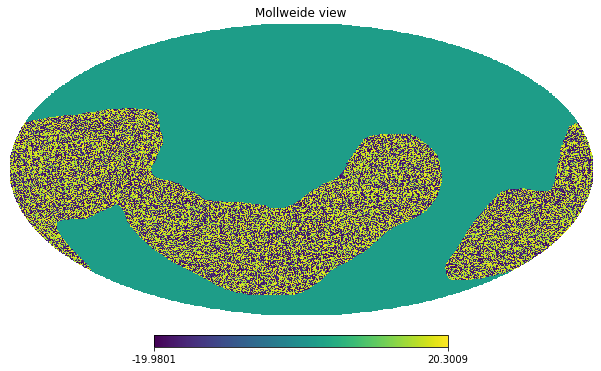

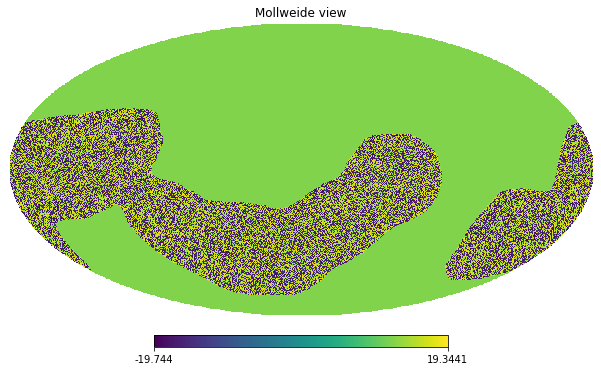

In [11]:
hp.mollview(q, norm='hist')
hp.mollview(u, norm='hist')

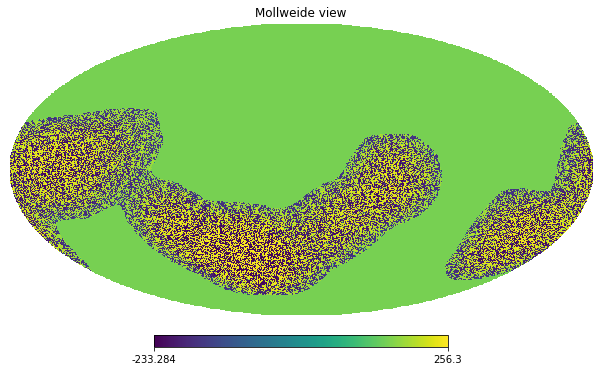

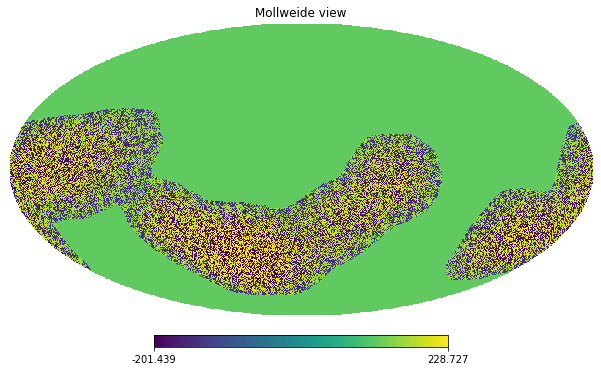

In [13]:
hp.mollview(q_ninv, norm='hist')
hp.mollview(u_ninv, norm='hist')

In [14]:
cl = hp.anafast([np.zeros_like(q),q,u], lmax=512, pol=True)
cl_ninv = hp.anafast([np.zeros_like(q),q_ninv,u_ninv], lmax=512, pol=True)

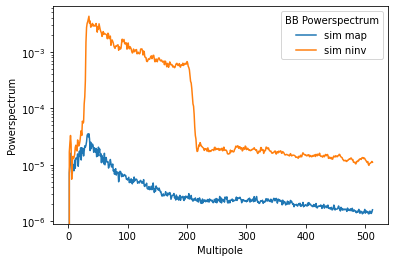

In [15]:
plt.plot(cl[2], label='sim map')
plt.plot(cl_ninv[2], label='sim ninv')
plt.legend(title='BB Powerspectrum')
plt.ylabel('Powerspectrum')
plt.xlabel('Multipole')
plt.yscale('log')

In [7]:
ith = job.get_ith_sim(0)

KeyboardInterrupt: 